<a href="https://colab.research.google.com/github/fabrytp8/AG1/blob/main/ej/clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pickle
from pprint import pprint
from skimage.feature import hog

from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier



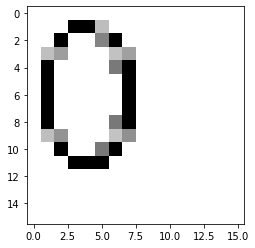

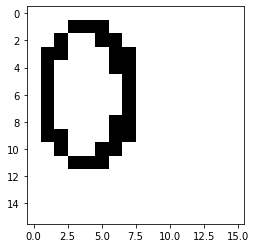

In [ ]:
#Carga de datos
folder = os.listdir('train/')
# print(folder)
img=cv2.imread('train/'+ 'digit_0_10_0.png',0)
# print(img)
plt.imshow(img,cmap='gray')
plt.show()
img[img<255]=0
plt.imshow(img,cmap='gray')
plt.show()
# print('xxxx')
# print(img)

In [ ]:
print(np.arange(len(folder)))
# pprint(img)
images, target = [] , []
for i in np.arange(len(folder)):
    name = folder[i]#nombre de imagen
    img = cv2.imread('train/'+ name,0)
    img[img<255]=0
    images.append(img)
    
    idx = name.find('_')
    tgt = int(name[idx+1])
    target.append(tgt)
images = np.array(images)
target = np.array(target)
print(np.shape(images))
print(np.shape(target))
df = pd.DataFrame(target)
print(df.dtypes)


[   0    1    2 ... 1287 1288 1289]
(1290, 16, 16)
(1290,)
0    int32
dtype: object


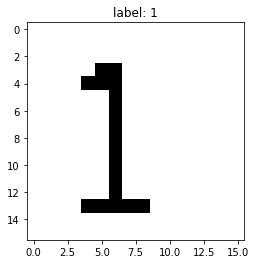

In [ ]:
# Exploración de los datos
img = images[195]
plt.imshow(img,cmap='gray')
plt.title('label: '+ str(target[195]))
plt.show()

In [ ]:
# Comprobar si están balanceados
val, frec = np.unique(target,return_counts=True)
print(val,frec)

[0 1 2 3 4 5 6 7 8 9] [129 129 129 129 129 129 129 129 129 129]


In [ ]:
# 1) Extarcción de características
X_train = []
y_train = target
for i in np.arange(len(folder)):
    features = hog(images[i],orientations=9, pixels_per_cell=(4,4), cells_per_block=(2,2),
                  transform_sqrt = True, block_norm='L1')
    X_train.append(features)

X_train = np.array(X_train)
print(np.shape(X_train)) 
print(np.shape(y_train))
# print(X_train)

(1290, 324)
(1290,)


In [ ]:
# 2) Estandarización de los atributos
std = preprocessing.StandardScaler()
X_std = std.fit_transform(X_train)
print(np.shape(X_std))

# Guardar el estandarizador
with open('objetos/estandarizador.pickle','wb') as fw:
    pickle.dump(std,fw)

(1290, 324)


In [ ]:
# 3) Selección de características
th = 0.0001
sel = VarianceThreshold(th)
X_train_sel = sel.fit_transform(X_std)
print(np.shape(X_train_sel))
# print(X_train_sel)

# Guardar el selector
with open('objetos/selector.pickle','wb') as fw:
    pickle.dump(sel,fw)

(1290, 144)


In [ ]:
# 4) Entrenamiento mediante cross-validation
clf = RandomForestClassifier(n_estimators = 200, criterion = 'gini', max_depth = None, random_state=42,
                            min_samples_split = 2, min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features='auto',
                            max_leaf_nodes=None, min_impurity_decrease=0, bootstrap = False)
results = cross_val_score(clf, X_train_sel, y_train, cv = KFold(n_splits = 5, shuffle = True, random_state = 42))

# Plotear resultados en terminos de media y desviación estandar
# print('Accuracy (media +/- desv.): %0.4f' % (results.mean(),results.std()))
print('Accuracy (media +/- desv.): %0.4f' % (results.mean()))

Accuracy (media +/- desv.): 0.9364


In [ ]:
# 4.1) Entrenamiento definitivo
final_clf = clf.fit(X_train_sel, y_train)

# Guardar modelo final
with open('objetos/clasificador.pickle','wb') as fw:
    pickle.dump(final_clf, fw)